## Fake News Detection

In [2]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [3]:
df = pd.read_csv("fake.csv")

In [4]:
#df = df[['title','comments','label']]

In [5]:
df.head()

,title,text,Sources,Date,label
0,Bungalow with private island up for sale for ?...,"A bungalow with a private island, located off ...",Bloomberg,15-02-2017,FAKE
1,Americans react to Bollywood song &# ;Pinga&# ;,A video by YouTube channel &# ;Fomo Daily&# ; ...,YouTube,02-08-2016,FAKE
2,World Toilet Day is celebrated on November 19,The United Nations has designated November 19 ...,United Nations,19-11-2016,FAKE
3,Over 1.57 lakh people affected by Assam floods,Over 1.57 lakh people reportedly have been aff...,Northeast Today,21-07-2016,FAKE
4,Varun Gandhi unhurt after stage collapses,BJP MP Varun Gandhi on Sunday escaped unhurt a...,India Today,13-03-2016,FAKE


In [6]:
df.shape

(56414, 5)

In [7]:
df.isnull().sum()

title      0
text       0
Sources    0
Date       0
label      0
dtype: int64

In [8]:
labels = df.label

In [9]:
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

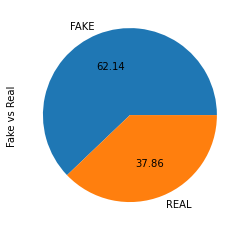

In [10]:
df.groupby('label').size().plot(kind='pie', autopct='%.2f',label='Fake vs Real')
plt.show()

In [11]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)
df.head()

,title,text,Sources,Date,label,title_length,text_length
0,Bungalow with private island up for sale for ?...,"A bungalow with a private island, located off ...",Bloomberg,15-02-2017,FAKE,54,334
1,Americans react to Bollywood song &# ;Pinga&# ;,A video by YouTube channel &# ;Fomo Daily&# ; ...,YouTube,02-08-2016,FAKE,47,418
2,World Toilet Day is celebrated on November 19,The United Nations has designated November 19 ...,United Nations,19-11-2016,FAKE,45,374
3,Over 1.57 lakh people affected by Assam floods,Over 1.57 lakh people reportedly have been aff...,Northeast Today,21-07-2016,FAKE,46,384
4,Varun Gandhi unhurt after stage collapses,BJP MP Varun Gandhi on Sunday escaped unhurt a...,India Today,13-03-2016,FAKE,41,368


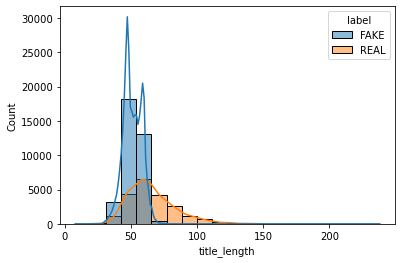

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(x = df["title_length"], hue = df["label"], kde=True, bins=20);


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df["title"], labels, test_size = 0.2, random_state = 20)

In [15]:
x_train.head()

14020    Nagpur children should be regularly exposed to...
30009     Vadodara ndrf joins search for missing student  
43441       Kaabil was a beautiful journey: Hrithik Roshan
14293    Goa behind the wheel computerised driving test...
1522     Jaipur yuvak prerak fellowship of rajasthan go...
Name: title, dtype: object

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [17]:
# initialise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [18]:
# fit and transform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [19]:
# initialise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [20]:
tf_train

<45131x31419 sparse matrix of type '<class 'numpy.float64'>'
	with 310352 stored elements in Compressed Sparse Row format>

In [21]:
# prediction the test dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)



In [22]:
#j=0
#for i in y_pred:
    #print(i)
    #j=j+1
#print(j)

In [23]:
x_train

14020    Nagpur children should be regularly exposed to...
30009     Vadodara ndrf joins search for missing student  
43441       Kaabil was a beautiful journey: Hrithik Roshan
14293    Goa behind the wheel computerised driving test...
1522     Jaipur yuvak prerak fellowship of rajasthan go...
                               ...                        
23452    &# ;Patel would have made Kashmir a part of In...
23775     RSS affiliate to launch party for 2017 Goa polls
37135    Tv news hindi vahbiz dorabjee vivian dsena is ...
27098    Three monkeys stolen from wildlife park in Aus...
48483    NASCAR driver pulled over for speeding on his ...
Name: title, Length: 45131, dtype: object

In [24]:
x_test

8868     Chennai dhinakaran family worth only rs 10 77 ...
38849         Civil rights activist Irom Sharmila turns 44
51814                 Maria Sharapova to miss Rio Olympics
10936    London&# ;s &# ;narrowest home&# ; on sale for...
6343                  Mirza-Hingis win St Petersburg title
                               ...                        
52425    Titan to foray into women&# ;s ethnic wear seg...
25629    Elections assembly elections goa news fir agai...
11209    Entertainment events lucknow a rainy day for t...
16445      Lucknow funds for up touch rs 1 21 lakh crore  
19557    Berlin truck attacker had 14 identities in Ger...
Name: title, Length: 11283, dtype: object

In [25]:
score = accuracy_score(y_test, y_pred)
print(score)


0.9393778250465302


In [26]:
res=round(score*100,2)
print(res)

93.94


In [27]:
print("Accuracy: ",res)

Accuracy:  93.94


In [28]:
import pickle
filename1 = 'accuracy_model.sav'
pickle.dump(res, open(filename1, 'wb'))

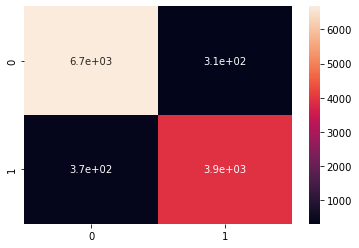

In [29]:
# confusion metrics
cm=confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
sns.heatmap(cm,annot=True)
plt.show()


In [30]:
# save model
import pickle
filename = 'finalized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))


In [31]:
# save vectorizer
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))